**Visualizacion y entrenamiento de un modelo de regresion lineal con scikit-learn**


**Importando las librerias **

In [1]:
import pandas as pd # Manejo de datos con la libreria pandas
import seaborn as sns # Creacion de graficas y visualizacion de datos
import matplotlib.pyplot as plt # Dependencia para crear graficos

**Conectando a google drive**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Ciencia de datos/studentsperformance_15085fee-8bc7-4d33-a182-655428728fe1.csv")

**Corremos el data frame importado desde google drive**

In [3]:
df # Corremos el data frame

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


**Usamos otro metodo de pandas para visualizar los 5 primeros registros del data frame o los que le pasemos de parametro**

In [4]:
df.head(10) #df.head nos sirve para visualizar los primeros 5 registors o el parametro que le pasemos

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [5]:
df.shape # sirve para saber el numero de columnas y de filas que tenemos en nuestro df

(1000, 8)

In [6]:
df.columns # para visualizar las columnas de nuestro set de datos

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [7]:
df.dtypes # Para explorar la naturaleza de nuestros datos(tipo de datos)

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

**Graficando**

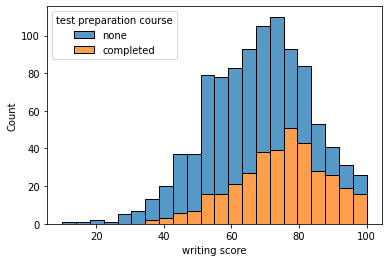

In [8]:
sns.histplot(data=df, x="writing score",hue="test preparation course", multiple="stack") # Creando un histograma con la libreria seaborn

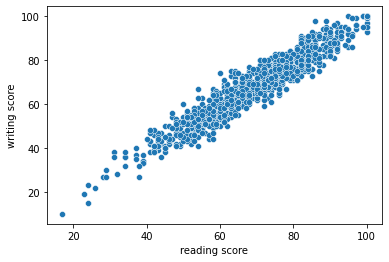

In [9]:
sns.scatterplot(data=df, x="reading score", y="writing score") # grafico de dispercion

In [10]:
freq = df["writing score"].value_counts()  # tabla de frecuencia 
df_freq = freq.to_frame()
df_freq.reset_index(inplace=True)
df_freq = df_freq.rename(columns={"index": "Writing score", "writing score": "Number of students"})
df_freq

,Writing score,Number of students
0,74,35
1,70,33
2,68,31
3,73,28
4,62,27
...,...,...
72,23,1
73,22,1
74,19,1
75,15,1


**Promedios**

In [11]:
# Promedio de los puntajes
df.mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

In [12]:
# Mediana de los puntajes
df.median()

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

**Entrenando nuestro modelo**

In [13]:
X = df["reading score"].values
Y = df["writing score"].values

X = X.reshape(-1,1) # Esto se hace para que los datos queden separados y los pueda leer luego
# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)



In [14]:
# Regresion lineal
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X_train,Y_train)

print("La pendiente es: ", reg.coef_) #La pendiente es el incremento de un valor con respecto a otro (Derivada) , por ejemplo: Aumenta 1 valor en X, aumentan 1.5 en Y
print("El bias es: ", reg.intercept_) # Bias es la diferencia entre la prediccion esperada de nuestro modelo y los valores verdaderos.


La pendiente es:  [0.99164604]
El bias es:  -0.6843430817830409


**Visualizacion de nuestro modelo**


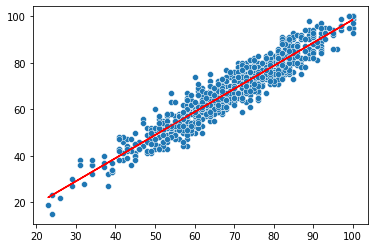

In [15]:
x_flat = X_train.flatten()

y_hat = reg.predict(X_train)

fig, ax = plt.subplots()
sns.scatterplot(x=x_flat, y=Y_train)
plt.plot(X_train, y_hat, color="r")

**Evaluacion de nuestro modelo**

In [16]:
from sklearn.metrics import mean_squared_error

y_pred = reg.predict(X_test)

# Calcular el mean squared error

print(mean_squared_error(Y_test, y_pred))

20.231156507414322


In [18]:
value = pd.DataFrame({"Actual test": Y_test.flatten(), "Predict": y_pred.flatten()})
value

,Actual test,Predict
0,100,98.480261
1,56,53.856189
2,81,84.597216
3,99,94.513676
4,80,81.622278
...,...,...
195,71,79.638986
196,63,61.789357
197,57,58.814419
198,62,63.772649
